# Project Sommelier Sciencers

## Goal: 

* Find the key drivers of wine quality.
* Using 3 clustering techniques to construct 4 machine learning models to predict wine quality from the wine quality (red and white) csv's from the Data World dataset.
* Display results using 5 vizzes.

---

## <div class="alert alert-block alert-info"> Imports<div>

In [1]:
# # Our Modules
import wrangle_ali as wr
import explore as ex
# import stats_conclude as sc
# import evaluate as ev
import auto_model2a as atm
import auto_model3 as atm3
import testing_models as tm
import wine_wrangle as ww

# Imports
import os

# Numbers
import pandas as pd 
import numpy as np
import scipy.stats as stats


# Vizzes
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting
from sklearn.model_selection import train_test_split

# Engineering
# GET THESE IMPORTS

# Modeling
# GET THESE IMPORTS

import warnings
warnings.filterwarnings("ignore")

Load in successful... awaiting commands


# <div class="alert alert-block alert-info">  Wrangle 
### Acquire:
* Data acquired from Data.World website
* Each row represents a wine
* Each column represents a feature
  
### Prepare: 
* combined CSV files
* renamed columns
* encoded categoricals
* checked:
    * nulls - none
    * data types
    * quality range
        * 3-9 not 0-10
        * there are no wines rated 0, 1, 2, or 10.
        * mean quality is 6
    * proportion of type
        * white = 75%
        * red = 25%
* outliers are identified and *not* removed
    
### Data Dictionary:
* Explanation of dataset features
 

| Feature | Definition (measurement)|
|:--------|:-----------|
|Fixed Acidity| The fixed amount of tartaric acid. (g/L)|
|Volatile Acidity| A wine's acetic acid; (High Volatility = High Vinegar-like smell). (g/L)|
|Citric Acid| The amount of citric acid; (Raises acidity, Lowers shelf-life). (g/L)|
|Residual Sugar| Leftover sugars after fermentation. (g/L)|
|Chlorides| Increases sodium levels; (Affects color, clarity, flavor, aroma). (g/L)|
|Free Sulfur Dioxide| Related to pH. Determines how much SO2 is available. (Increases shelf-life, decreases palatability). (mg/L)|
|Total Sulfur Dioxide| Summation of free and bound SO2. (Limited to 350ppm: 0-150, low-processed, 150+ highly processed). (mg/L)|
|Density| Between 1.08 and 1.09. (Insight into fermentation process of yeast growth). (g/L)|
|pH| 2.5: more acidic - 4.5: less acidic (range)|
|Sulphates| Added to stop fermentation (Preservative) (g/L)|
|Alcohol| Related to Residual Sugars. By-product of fermentation process (vol%)|
|Quality| Score assigned between 0 and 10; 0=low, 10=best|
|Type| Red or White wine

In [2]:
# Acquire and Prepare
df = wr.wrangle_wine_initial()

Acquire Details
CSV found
CSV found
Combined CSV's into one DF
--------------------------------------------
Prepare Details
Renamed columns for ease of use
Encoded Type column


In [ ]:
# Idenitfy Outliers
wr.outliers(df)

In [3]:
# Split
train, validate, test = wr.split_data_stratify(df, 'quality')

<div class="alert alert-block alert-info"> 
    
## Explore
    
### Questions To Answer:
1. Does sodium (chloride) affect quality?
2. Is free sulfur dioxide related to pH?
3. Is alcohol content related to residual sugars?
4. Does alcohol content affect quality of wine?


## <div class="alert alert-block alert-info">  1. Does sodium affect quality?

$H_o$: As the rank of quality increases, the amount of sodium does not change

$H_a$: As the rank of quality increases, the amount of sodium does change

In [4]:
# visualize
ex.sodium_quality_hist()

In [5]:
# analyze using Spearman's Test for correlation for two continous variables because quality is rank ordered
sc.conclude_spearmanr(train.sodium, train.quality)

In [7]:
# summarize

#sns.barplot(data=train, x='quality', y='sodium')
#plt.show()

# MD:
# Yes, negative relationship found (-.31) using Spearman's; visually matches with the downward trend.

## <div class="alert alert-block alert-info">  2. Is free sulfur dioxide related to pH?

$H_o$: There is no linear relationship

$H_a$: There is a linear relationship

In [4]:
# visualize
ex.free_ph_hist()

In [5]:
# analyze (ot normal distribution) proceed with spearman's correlation test
sc.conclude_spearmanr(train.free_SO2_shelf_life, train.pH)

In [7]:
# # summarize

# # visualize
# sns.regplot(data=train, x='pH', y='free_SO2_shelf_life',x_jitter=.1, line_kws={'color':'orange'})
# plt.title("Correlation of Free SO2 and pH")
# plt.show()

# # Rejected the null, but barely

## <div class="alert alert-block alert-info">  3. Is alcohol content related to residual sugars?

$H_o$: There is no linear relationship

$H_a$: There is a linear relationship

In [4]:
# visualize
ex.alcohol_sugar_hist()

In [5]:
# analyze with spearman's r - assumptions not met for pearson's
sc.conclude_spearmanr(train.alcohol, train.residual_sugar)

In [7]:
# # summarize

# # visualize
# sns.regplot(data=train, x='alcohol', y='residual_sugar',x_jitter=.1, line_kws={'color':'orange'})
# plt.title("Correlation of Alcohol and Residual Sugars")
# plt.show()

# # Yes, negative relationship (-.32)

## <div class="alert alert-block alert-info">  4. Does alcohol content affect quality of wine?

$H_o$: As the alcohol percentage increases, the rank of quality does not change

$H_a$: As the alcohol percentage increases, the rank of quality does change

In [4]:
# visualize
ex.alcohol_quality_hist()

In [5]:
# analyze (spearman or pearson - they both get .44)
sc.conclude_pearsonr(train.alcohol, train.quality)

In [7]:
# # summarize

# # visualize
# sns.barplot(data=train, y='alcohol', x='quality')
# plt.title("Correlation of Alcohol and Quality Rating")
# plt.show()

# # Yes, positive relationship (.44)

<div class="alert alert-block alert-info">  

### Explore Takeaways:

**Target = Quality of Wine**
    
* Answer the following initial questions:
   1. Do chlorides (sodium) affect quality? <br>
       * Yes, negative relationship (-.31)
   2. Is free sulfur dioxide related to pH? <br>
       * Rejected the null, but barely
   3. Is alcohol content related to residual sugars? <br>
       * Yes, negative relationship (-.32)
   4. Does alcohol content affect quality of wine? <br>
       * Yes, positive relationship (.44)

**Visuals**

* findings for relationship to quality:
    * fixed acidity increases, quality goes down
    * volatile acidity increases, quality goes down - worse than fixed 
    * citric acid has slight positive relationship
    * residual sugar has no relationship - not visually significant
    * chlorides has negative relationship, more chlorides = less quality *super* negative
    * free sulfur dioxide increases quality slightly (look further into type as a 3rd variable)
    * total sulfur dioxide has no signifcance
    * density has negative relationship *significantly* negative
    * pH has no affect on quality
    * preservatives have no affect on quality
    * alcohol is a positive relationship (moderately positive)
    * type has no impact - red is slightly less quality

**Numericals**

* quality range is actually 3-9, not 0-10
    * mean is 5.8
* type has a 75/25 percent proportion
    * white = 75%
    * red = 25%
* pH typical range 0-14
    * wine range 2.72 - 4.01
    * mean 3.2
    * battery acid is a 1, vinegar is 3, tomato juice is a 4


**Feature Engineering**

* total_acidity = fixed + volatile acids
    * contributes directy to quality of wine - negative correlation, higher the acid, lower the quality
 
<div> 

<div class="alert alert-block alert-info"> 

## Preprocessing

* Encode any categoricals

* Engineered Features:
    * None for this iteration<br>
    
    
* Split into X_train, y_train, X_validate, y_validate, X_test, y_test


In [26]:
# Assign


NameError: name 'df' is not defined

In [ ]:
# Scale
X_train_scaled, X_validate_scaled, X_test_scaled = ww.scale_data(X_train, X_validate, X_test)


NameError: name 'X_train' is not defined

<div class="alert alert-block alert-info"> 
    
# Clustering

**Feature sets to send in:**

* fixed, volatile, citric acid
* residual sugar, alcohol, type_white
* pH, preservatives, density

### Feature Set 1:

* use X_train_scaled
* clusters = 2
* fixed, volatile, citric acid

In [137]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['fixed_acidity', 'volatile_acidity','citric_acid']])

# use on X
pred_set_1 = kmeans.predict(X_train_scaled[['fixed_acidity', 'volatile_acidity','citric_acid']])

In [138]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_1'] = pred_set_1
X_train_scaled['cluster_set_1'] = pred_set_1

# rename clusters using map
X_train['cluster_set_1'] = X_train.cluster_set_1.map({
    0:'High Citric Acid - Low Volatile Acidity',
    1:'Low Citric Acid - High Volatile Acidity'})
X_train_scaled['cluster_set_1'] = X_train_scaled.cluster_set_1.map({
    0:'High Citric Acid - Low Volatile Acidity',
    1:'Low Citric Acid - High Volatile Acidity'})

X_train.sample(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  sodium  \
2610            6.3              0.27         0.46            11.1   0.053   
2140            7.7              0.28         0.35            15.3   0.056   
594             7.9              0.72         0.17             2.6   0.096   
28              7.4              0.27         0.48             1.1   0.047   
1031            6.2              0.34         0.29             7.6   0.047   
1161            8.8              0.45         0.43             1.4   0.076   
983             5.7              0.36         0.34             4.2   0.026   
876             7.1              0.47         0.00             2.2   0.067   
1224           12.6              0.39         0.49             2.5   0.080   
3744            7.0              0.15         0.28            14.7   0.051   

      free_SO2_shelf_life  total_SO2_processed_level  density    pH  \
2610                 44.0                      177.0  0.99691  3.18   
2140                 31.0                      117.0  0.99980  3.27   
594                  20.0                       38.0  0.99780  3.40   
28                   17.0                      132.0  0.99140  3.19   
1031                 45.0                      232.0  0.99550  3.35   
1161                 12.0                       21.0  0.99551  3.21   
983                  21.0                       77.0  0.99070  3.41   
876                   7.0                       14.0  0.99517  3.40   
1224                  8.0                       20.0  0.99920  3.07   
3744                 29.0                      149.0  0.99792  2.96   

      preservatives  alcohol  quality  type_white  \
2610           0.67      9.4        5           1   
2140           0.50      9.6        5           1   
594            0.53      9.5        5           0   
28             0.49     11.6        6           1   
1031           0.62     10.0        6           1   
1161           0.75     10.2        6           0   
983            0.45     11.9        6           1   
876            0.58     10.9        4           0   
1224           0.82     10.3        6           0   
3744           0.39      9.0        7           1   

                                cluster_set_1  
2610  High Citric Acid - Low Volatile Acidity  
2140  High Citric Acid - Low Volatile Acidity  
594   Low Citric Acid - High Volatile Acidity  
28    High Citric Acid - Low Volatile Acidity  
1031  High Citric Acid - Low Volatile Acidity  
1161  High Citric Acid - Low Volatile Acidity  
983   High Citric Acid - Low Volatile Acidity  
876   Low Citric Acid - High Volatile Acidity  
1224  High Citric Acid - Low Volatile Acidity  
3744  High Citric Acid - Low Volatile Acidity

In [139]:
# visualize means first 
X_train.groupby('quality')['fixed_acidity', 'volatile_acidity','citric_acid'].mean()

fixed_acidity  volatile_acidity  citric_acid
quality                                              
3             8.155556          0.593056     0.281111
4             7.324615          0.469808     0.283385
5             7.377886          0.391720     0.306919
6             7.132069          0.313407     0.322816
7             7.115301          0.288547     0.332751
8             6.770690          0.280172     0.324483
9             7.700000          0.290000     0.366667

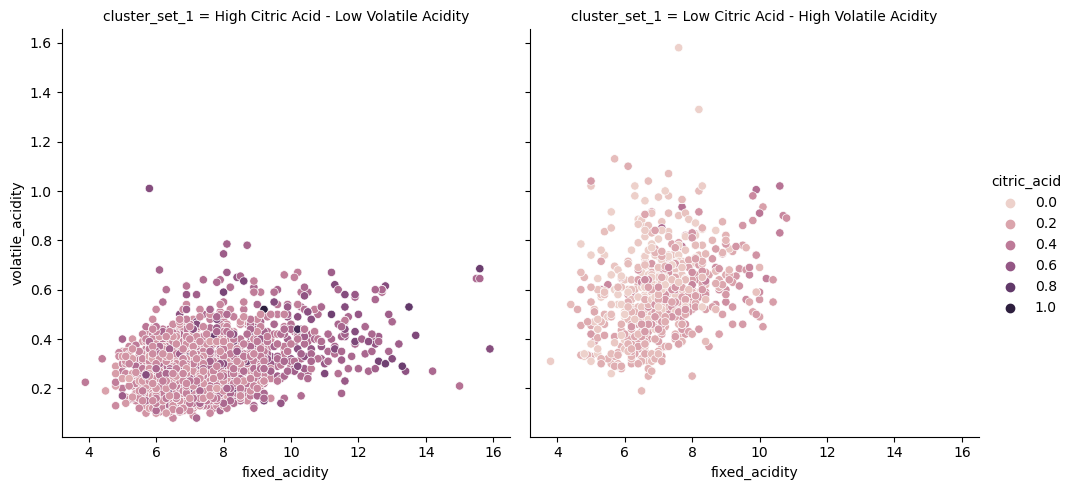

In [140]:
# separate to see each cluster - hue is citric acid
sns.relplot(data=X_train, x='fixed_acidity', y='volatile_acidity', hue='citric_acid', col='cluster_set_1', col_wrap=2)
plt.show()

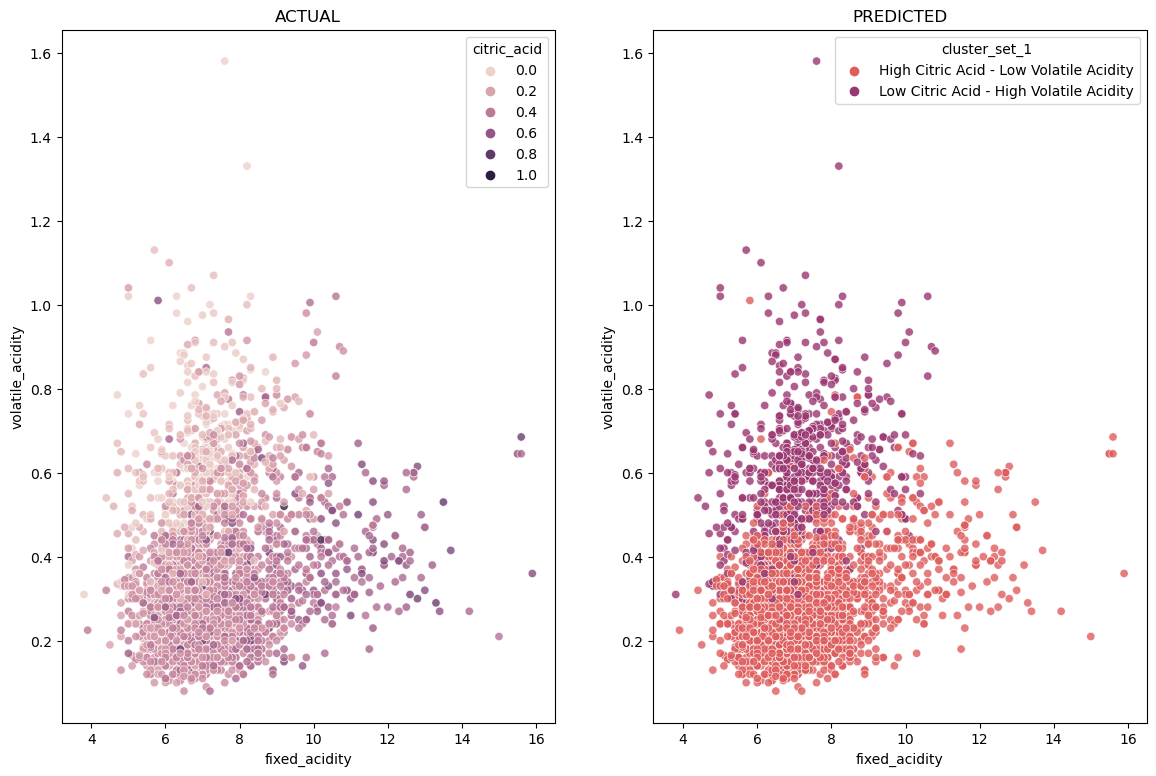

In [141]:
# viz to see cluster results against actual graph 
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, x='fixed_acidity', y='volatile_acidity', hue='citric_acid', alpha=.8)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, x='fixed_acidity', y='volatile_acidity', hue='cluster_set_1', palette='flare', alpha=.8)
plt.title('PREDICTED')
plt.show()

In [152]:
# explore cluster_set_1 with the target variable



### Feature Set 1 Takeaways:

Features sent in:
* clusters = 2
* fixed, volatile, citric acid

Means of the centroids:
* between quality rating 5 and 6, the volatile acidity mean drops from 39 to 31 and continues it's negative trend
* quality level 8 has the lowest fixed acidity while quality level 9 (highest) has the second highest mean
* citric acid means have an inverse relationship to volatile acidity

Visuals:
* Clustering looks to be fairly weak. There is a relationship between citric acid and volatile acid but I don't believe that amounts to any significant clusters.
* Volatile Acidity results from the degradation of citric acid. As citric acid degrades, volatile acidity goes up.


### Feature Set 2:

* use X_train_scaled
* clusters = 2
* residual sugar, alcohol, type_white

In [142]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['residual_sugar', 'alcohol','type_white']])

# use on X
pred_set_2 = kmeans.predict(X_train_scaled[['residual_sugar', 'alcohol','type_white']])

In [143]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_2'] = pred_set_2
X_train_scaled['cluster_set_2'] = pred_set_2

# rename clusters using map
X_train['cluster_set_2'] = X_train.cluster_set_2.map({
    0:'White Wine',
    1:'Red Wine'})
X_train_scaled['cluster_set_2'] = X_train_scaled.cluster_set_2.map({
    0:'White Wine',
    1:'Red Wine'})

X_train.sample(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  sodium  \
940             6.2              0.34         0.28            7.50   0.034   
1489            7.9              0.16         0.74           17.85   0.037   
3253            5.3              0.30         0.16            4.20   0.029   
725             9.0              0.66         0.17            3.00   0.077   
4213            6.5              0.38         0.53            1.40   0.142   
3147            7.2              0.32         0.40            8.70   0.038   
3716            6.8              0.22         0.26            1.20   0.041   
1188            7.1              0.21         0.30            1.40   0.037   
2339            7.0              0.23         0.26            7.20   0.041   
1650            7.6              0.31         0.49            3.95   0.044   

      free_SO2_shelf_life  total_SO2_processed_level  density    pH  \
940                  40.0                      197.0  0.99485  3.14   
1489                 52.0                      187.0  0.99980  2.99   
3253                 37.0                      100.0  0.99050  3.30   
725                   5.0                       13.0  0.99760  3.29   
4213                  5.0                       69.0  0.99260  3.14   
3147                 45.0                      154.0  0.99568  3.20   
3716                 29.0                      182.0  0.99104  3.04   
1188                 45.0                      143.0  0.99320  3.13   
2339                 21.0                       90.0  0.99509  3.22   
1650                 27.0                      131.0  0.99120  3.08   

      preservatives  alcohol  quality  type_white  \
940            0.60      9.7        5           1   
1489           0.41      9.3        5           1   
3253           0.36     11.8        8           1   
725            0.55     10.4        5           0   
4213           0.52     10.1        4           1   
3147           0.47     10.4        6           1   
3716           0.35     11.2        5           1   
1188           0.33      9.9        6           1   
2339           0.55      9.5        6           1   
1650           0.67     12.8        7           1   

                                cluster_set_1 cluster_set_2  
940   High Citric Acid - Low Volatile Acidity    White Wine  
1489  High Citric Acid - Low Volatile Acidity    White Wine  
3253  Low Citric Acid - High Volatile Acidity    White Wine  
725   Low Citric Acid - High Volatile Acidity      Red Wine  
4213  High Citric Acid - Low Volatile Acidity    White Wine  
3147  High Citric Acid - Low Volatile Acidity    White Wine  
3716  High Citric Acid - Low Volatile Acidity    White Wine  
1188  High Citric Acid - Low Volatile Acidity    White Wine  
2339  High Citric Acid - Low Volatile Acidity    White Wine  
1650  High Citric Acid - Low Volatile Acidity    White Wine

In [144]:
# visualize first numerically
X_train.groupby('quality')['residual_sugar', 'alcohol','type_white'].mean()

residual_sugar    alcohol  type_white
quality                                       
3              4.333333  10.086111    0.555556
4              3.971538  10.227308    0.715385
5              5.771724   9.832241    0.677067
6              5.512816  10.621830    0.784832
7              4.790340  11.407584    0.828439
8              5.161207  11.593966    0.905172
9              4.733333  11.766667    1.000000

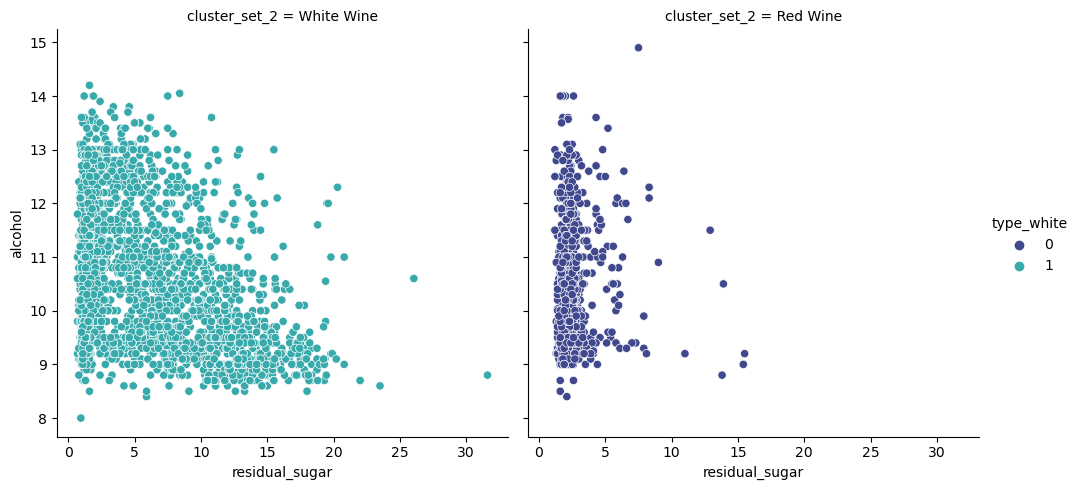

In [145]:
# separate to see each cluster - hue is density
sns.relplot(data=X_train, x='residual_sugar', y='alcohol', hue='type_white', col='cluster_set_2', col_wrap=2, palette='mako')
plt.show()

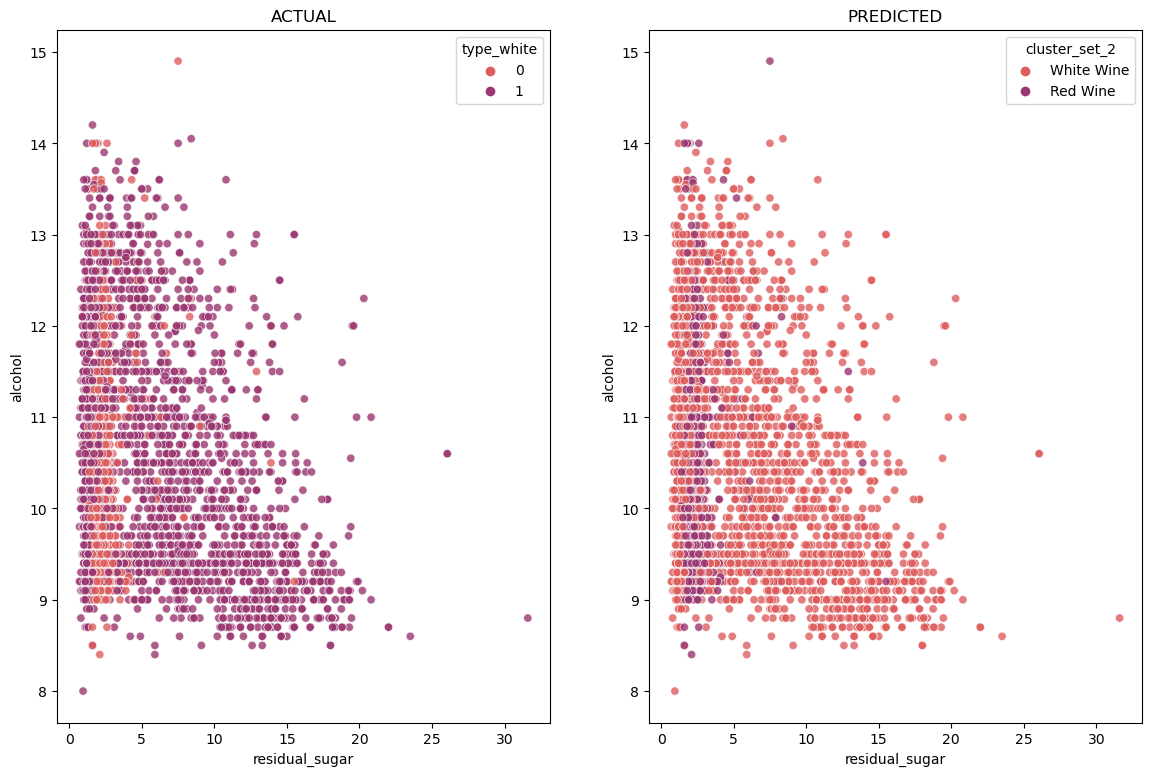

In [146]:
# viz to see cluster results against actual graph
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, x='residual_sugar', y='alcohol', hue='type_white', palette='flare', alpha=.8)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, x='residual_sugar', y='alcohol', hue='cluster_set_2', palette='flare', alpha=.8)
plt.title('PREDICTED')
plt.show()

In [153]:
# explore cluster_set_2 with the target variable


### Feature Set 2 Takeaways:

Features sent in:
* clusters = 2
* residual sugar, alcohol, type_white

Means of the centroids:
* as quality increases, alcohol content increases
* quality of 9 has a mean of 1 for type_white indicating ALL the wine that is that quality is a white wine

Visuals:
* Clustering successful for this relationship
* it looks like after ~2.5 residual sugar and alcohol relationship changes - that makes sense becuase red wine is lower in sugars than white wine, which is what is displayed visually
* white wine results in a much wider range of residual sugars
* red and white share the same range of alcohol levels


### Feature Set 3:

* use X_train_scaled
* clusters = 2
* pH, preservatives, density

In [147]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=2, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['pH', 'preservatives','density']])

# use on X
pred_set_3 = kmeans.predict(X_train_scaled[['pH', 'preservatives','density']])

In [148]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_3'] = pred_set_3
X_train_scaled['cluster_set_3'] = pred_set_3

# rename clusters using map
X_train['cluster_set_3'] = X_train.cluster_set_3.map({
    0:'Lower Preservatives - Lower Density',
    1:'Higher Preservatives - Higher Density'})
X_train_scaled['cluster_set_3'] = X_train_scaled.cluster_set_3.map({
    0:'Lower Preservatives - Lower Density',
    1:'Higher Preservatives - Higher Density'})

X_train.sample(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  sodium  \
2917            7.1             0.360         0.40            1.95   0.033   
3574            8.1             0.170         0.21            1.60   0.036   
1222            8.1             0.530         0.22            2.20   0.078   
1220            6.4             0.230         0.33            1.15   0.044   
948             8.9             0.120         0.45            1.80   0.075   
1057            7.6             0.420         0.25            3.90   0.104   
2576            6.5             0.270         0.40           10.00   0.039   
330             6.4             0.320         0.35            4.80   0.030   
1070            9.3             0.330         0.45            1.50   0.057   
2883            6.8             0.475         0.33            3.95   0.047   

      free_SO2_shelf_life  total_SO2_processed_level  density    pH  \
2917                 26.0                      118.0  0.98934  3.20   
3574                 24.0                      119.0  0.99396  3.18   
1222                 33.0                       89.0  0.99678  3.26   
1220                 15.5                      217.5  0.99200  3.33   
948                  10.0                       21.0  0.99552  3.41   
1057                 28.0                       90.0  0.99784  3.15   
2576                 74.0                      227.0  0.99582  3.18   
330                  34.0                      101.0  0.99120  3.36   
1070                 19.0                       37.0  0.99498  3.18   
2883                 16.0                       81.0  0.98988  3.23   

      preservatives  alcohol  quality  type_white  \
2917           0.45     13.5        7           1   
3574           0.52     10.1        6           1   
1222           0.46      9.6        6           0   
1220           0.44     11.0        6           1   
948            0.76     11.9        7           0   
1057           0.57      9.1        5           0   
2576           0.50      9.4        5           1   
330            0.60     12.5        8           1   
1070           0.89     11.1        7           0   
2883           0.53     13.4        7           1   

                                cluster_set_1 cluster_set_2  \
2917  High Citric Acid - Low Volatile Acidity    White Wine   
3574  High Citric Acid - Low Volatile Acidity    White Wine   
1222  Low Citric Acid - High Volatile Acidity      Red Wine   
1220  High Citric Acid - Low Volatile Acidity    White Wine   
948   High Citric Acid - Low Volatile Acidity      Red Wine   
1057  High Citric Acid - Low Volatile Acidity      Red Wine   
2576  High Citric Acid - Low Volatile Acidity    White Wine   
330   High Citric Acid - Low Volatile Acidity    White Wine   
1070  High Citric Acid - Low Volatile Acidity      Red Wine   
2883  High Citric Acid - Low Volatile Acidity    White Wine   

                              cluster_set_3  
2917    Lower Preservatives - Lower Density  
3574    Lower Preservatives - Lower Density  
1222  Higher Preservatives - Higher Density  
1220    Lower Preservatives - Lower Density  
948   Higher Preservatives - Higher Density  
1057  Higher Preservatives - Higher Density  
2576  Higher Preservatives - Higher Density  
330     Lower Preservatives - Lower Density  
1070  Higher Preservatives - Higher Density  
2883    Lower Preservatives - Lower Density

In [149]:
# visualize first numerically
X_train.groupby('quality')['pH', 'preservatives','density'].mean()

pH  preservatives   density
quality                                   
3        3.277222       0.534444  0.996332
4        3.231462       0.506308  0.994870
5        3.212956       0.529337  0.995896
6        3.216955       0.529377  0.994432
7        3.229134       0.544080  0.993065
8        3.240086       0.523103  0.992533
9        3.296667       0.516667  0.992400

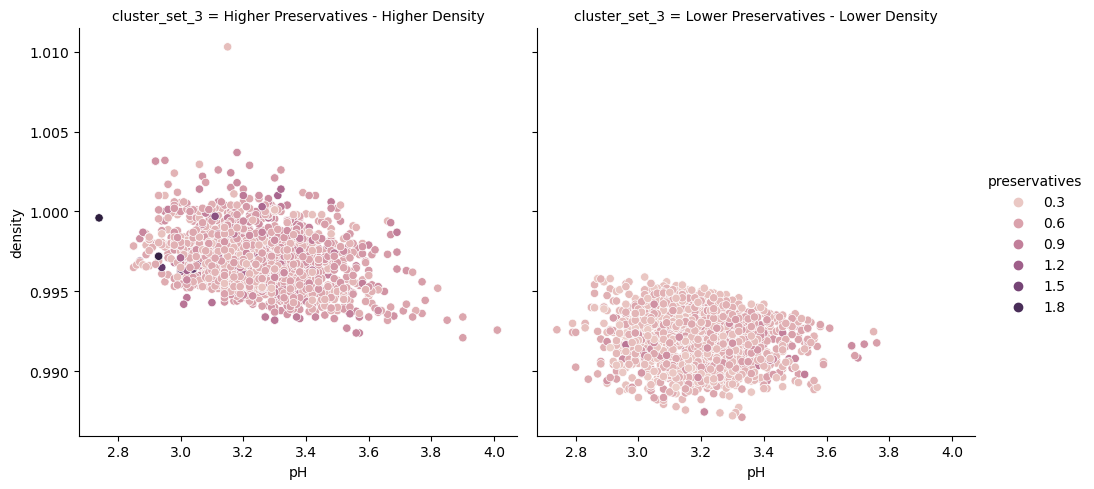

In [150]:
# separate to see each cluster - hue is preservatives
sns.relplot(data=X_train, y='density', x='pH', hue='preservatives', col='cluster_set_3', col_wrap=2)
plt.show()

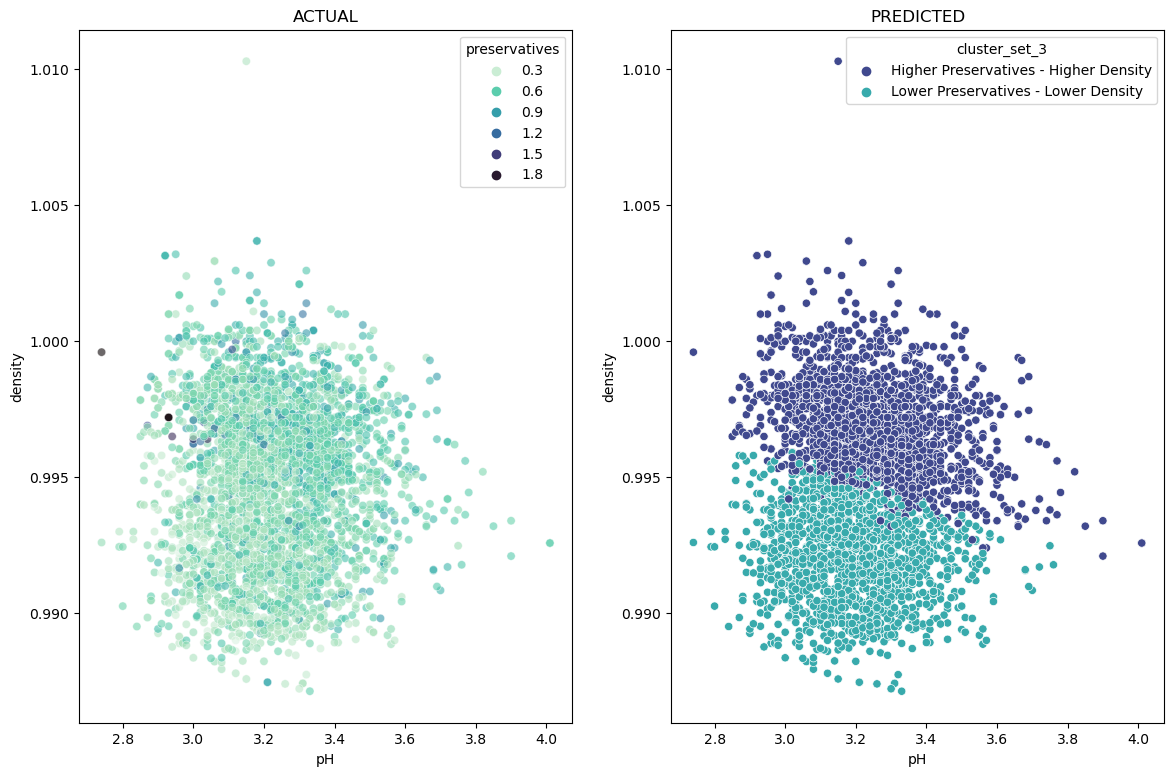

In [151]:
# graphically
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, y='density', x='pH', hue='preservatives', palette='mako_r', alpha=.6)
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, y='density', x='pH', hue='cluster_set_3', palette='mako')
plt.title('PREDICTED')
plt.show()

In [154]:
# explore cluster_set_3 with the target variable


### Feature Set 3 Takeaways:

Features sent in:
* clusters = 2
* pH, preservatives, density

Means of the centroids:
* resulted in zero significance

Visuals:
* clustering failed, there are no clusters to be made
* *slight* relationship noted between density and preservatives, as density goes up, so do preservatives.


<div class="alert alert-block alert-info"> 

# Clustering Takeaway:

* as quality increases, alcohol content increases
* slight relationship noted between density and preservatives, as density goes up, so do preservatives.
* white wine results in a much wider range of residual sugars
* Volatile Acidity results from the degradation of citric acid. As citric acid degrades, volatile acidity goes up.

<div class="alert alert-block alert-info"> 
    
# Modeling Overview
        
## Features to Used    
* All features were used except for wine type due to very low correlation with quality
* Classification models out perfomred regression models

    
---
# Models Used and Metrics       

## **Classification Models Used:**
    
* K-Nearest Neighbors
* Random Forest
* Logistic Regression
 
#### Baseline: 44%    
#### Accuracy and precision are the evaluation metrics
  

In [14]:
#spliting x and y into train, validate, and test groups
X_train, X_validate, X_test =train[["alcohol","density","chlorides","volatile_acidity","fixed_acidity", "citric_acid","residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide" ,"pH","sulphates"]], validate_wine[["alcohol","density","chlorides","volatile_acidity","fixed_acidity", "citric_acid","residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide" ,"pH","sulphates"]], test_wine[["alcohol","density","chlorides","volatile_acidity","fixed_acidity", "citric_acid","residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide" ,"pH","sulphates"]]
y_train, y_validate, y_test = train[["quality"]], validate[["quality"]], test[["quality"]]

In [13]:
#runs the automatic knn graph and metrics function 
atm.auto_knn_graph(X_train, y_train, X_validate, y_validate)

In [ ]:
#runs the automatic decision tree graph and metrics function
atm.auto_random_trees(X_train, y_train, X_validate, y_validate)

In [ ]:
#runs the automatic logistic regression graph and metrics function
atm.auto_lo_regress(X_train, y_train, X_validate, y_validate)

## Classification Performance
### Out of classifcation models random forest at a depth of 20 had the highest accuracy at 64% (beatig the baseline of 44%) with relatively high precision
### Precision scores for the model:
    - Quality 3 : 0%
    - Quality 4 : 80%
    - Quality 5 : 67%
    - Quality 6 : 62%
    - Quality 7 : 68%
    - Quality 8 : 100%
    - Quality 9 : 0%

----    

## **Regression Models Used:**

* Ordinary Least Squares
* LASSO + LARS
* Polynomial Regression
* Generalized Linear Model 

#### Note: data scaled using MinMax scaler

In [ ]:
#funcition to scale the data
X_train_scaled, X_validate_scaled, X_test_scaled = ww.scale_data(X_train, X_validate, X_test)


NameError: name 'X_train' is not defined

In [ ]:
atm3.auto_regress( y_train, train, X_train_scaled, X_validate_scaled, y_validate, X_test_scaled)

## Regression Performance
### Out of the regression models GLM (Tweedie Test) peformed the best beating the RMSE baseline of .87 with an RMSE of .74 at r^2 rate of .28

In [ ]:
# Charts the GLM model performance showing predicted vs actual
tm.test_tweedie_model(y_train, y_test, X_train_scaled,X_test_scaled)

<div class="alert alert-block alert-info">
    
# Model conclusions

### The random forest performed well at predicting wines in the quality ranges of 4-7 even hitting over 80% true positive rates at 4 and 7. The model preformed worse at the end ranges mostly due to the fact that in those ranges there are limited number of wines. 

### While the tweedie model beat baseline at % a .74 RMSE means that predictions will still be off nearly an entire quality level. This is refelcted in the graph by showing how that most of the predictions are clumped in the middle. 

### Classification modeling (random forest) is comparativly better than any regression model for predicting specific catagories sprend across a greater range of predicte and actual datapoints.

<div class="alert alert-block alert-info">
    
# Project Conclusion
    

### Explore:
    
* 
  
* 
  
* 
  
* 
    
### Modeling:
    

    
### Recommendations and Next Steps:
 
* For the data engineers: 
* For the data scientsists: 
* For the business: 